In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
os.chdir(r'C:\Users\HP\Desktop\projects\final project\project 3\final project 3\data')
data = pd.read_excel('Rainfall123.xlsx')
data.head()

INDEX  YEAR  MN  MMAX  TMRF  MMIN  LMIN   MWS  HMAX   MVP   MLO  MMD   
0  BULDANA  1990   1  29.3   1.5  14.5  12.7   6.3  32.4  13.4  13.4  0.2  \
1  BULDANA  1990   2  32.2   0.0  14.6  13.6   6.3  32.4  12.3  12.3  0.8   
2  BULDANA  1990   3  34.0   0.0  17.0  14.0   6.4  36.4  17.2  17.2  0.3   
3  BULDANA  1990   4  37.7   0.0  21.3  19.6   8.6  40.4  20.8  20.8  0.0   
4  BULDANA  1990   5  36.2  59.6  22.3  18.2  10.6  39.2   0.0   0.0  1.2   

   MHG  MTC  RD  HVYRF  P1  P2  
0  0.0  0.2   0    1.5   0   1  
1  0.0  0.8   0    0.0   0   0  
2  0.0  0.3   0    0.0   0   0  
3  0.0  0.0   0    0.0   0   0  
4  0.0  2.1   6   18.8   0   6

In [3]:
data["INDEX"].unique()

array(['BULDANA', 'AKOLA CITY', 'AKOLA', 'AMRAOTI', 'MUMBAI (SANTACRUZ)',
       'AHMEDNAGAR', 'BEED', 'CHIKALTHANA', 'MUMBAI (KULABA)', 'JALGAON',
       'NAGPUR CITY', 'NAGPUR', 'NANDED', 'LATUR', 'KOLHAPUR',
       'NASIK (OZAR)', 'NASHIK ', 'NASHIK  (MALEGAON)', 'RAIGAD (ALIBAG)',
       'RAIGAD (BHIRA)', 'OSMANABAD'], dtype=object)

In [4]:
data.shape

(4962, 18)

In [5]:
data.columns

Index(['INDEX', 'YEAR', 'MN', 'MMAX', 'TMRF', 'MMIN', 'LMIN', 'MWS', 'HMAX',
       'MVP', 'MLO', 'MMD', 'MHG', 'MTC', 'RD', 'HVYRF', 'P1', 'P2'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INDEX   4962 non-null   object 
 1   YEAR    4962 non-null   int64  
 2   MN      4962 non-null   int64  
 3   MMAX    4961 non-null   float64
 4   TMRF    4962 non-null   float64
 5   MMIN    4960 non-null   float64
 6   LMIN    4962 non-null   float64
 7   MWS     4962 non-null   float64
 8   HMAX    4960 non-null   float64
 9   MVP     4962 non-null   float64
 10  MLO     4962 non-null   float64
 11  MMD     4962 non-null   float64
 12  MHG     4962 non-null   float64
 13  MTC     4962 non-null   float64
 14  RD      4962 non-null   int64  
 15  HVYRF   4962 non-null   float64
 16  P1      4962 non-null   int64  
 17  P2      4962 non-null   int64  
dtypes: float64(12), int64(5), object(1)
memory usage: 697.9+ KB


In [7]:
data.describe()

YEAR           MN         MMAX         TMRF         MMIN   
count  4962.000000  4962.000000  4961.000000  4962.000000  4960.000000  \
mean   2002.587263     6.443168    31.272163   109.863241    19.705585   
std       8.482177     3.451115     7.655666   231.993913     5.827054   
min    1990.000000     1.000000     0.000000     0.000000     0.000000   
25%    1995.000000     3.000000    29.900000     0.000000    16.700000   
50%    2002.000000     6.000000    31.700000    11.350000    21.100000   
75%    2009.000000     9.000000    34.200000   128.000000    23.900000   
max    2022.000000    12.000000    45.300000  3578.000000    30.200000   

              LMIN          MWS         HMAX          MVP          MLO   
count  4962.000000  4962.000000  4960.000000  4962.000000  4962.000000  \
mean     16.606127     5.012616    34.947419    20.158061     2.130109   
std       5.859241     4.401269     7.496872     8.448812     4.113179   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      12.600000     1.900000    32.900000    14.600000     0.100000   
50%      18.000000     4.400000    35.100000    21.300000     0.700000   
75%      21.300000     7.100000    38.300000    26.500000     2.600000   
max      27.700000    31.500000    49.000000    37.000000    35.400000   

               MMD          MHG          MTC           RD        HVYRF   
count  4962.000000  4962.000000  4962.000000  4962.000000  4962.000000  \
mean      0.849738     0.347965     2.512435     4.608827    31.546332   
std       1.019193     0.484807     2.345314     6.495246    53.003701   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.500000     0.000000     0.000000   
50%       0.400000     0.200000     1.700000     1.000000     8.200000   
75%       1.400000     0.500000     4.500000     7.000000    43.600000   
max       6.500000     6.100000     8.000000    31.000000   944.200000   

                P1           P2  
count  4962.000000  4962.000000  
mean      0.294639     6.421403  
std       0.696297     8.335630  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     2.000000  
75%       0.000000    11.000000  
max       8.000000    31.000000

In [8]:
data.isnull().sum()

INDEX    0
YEAR     0
MN       0
MMAX     1
TMRF     0
MMIN     2
LMIN     0
MWS      0
HMAX     2
MVP      0
MLO      0
MMD      0
MHG      0
MTC      0
RD       0
HVYRF    0
P1       0
P2       0
dtype: int64

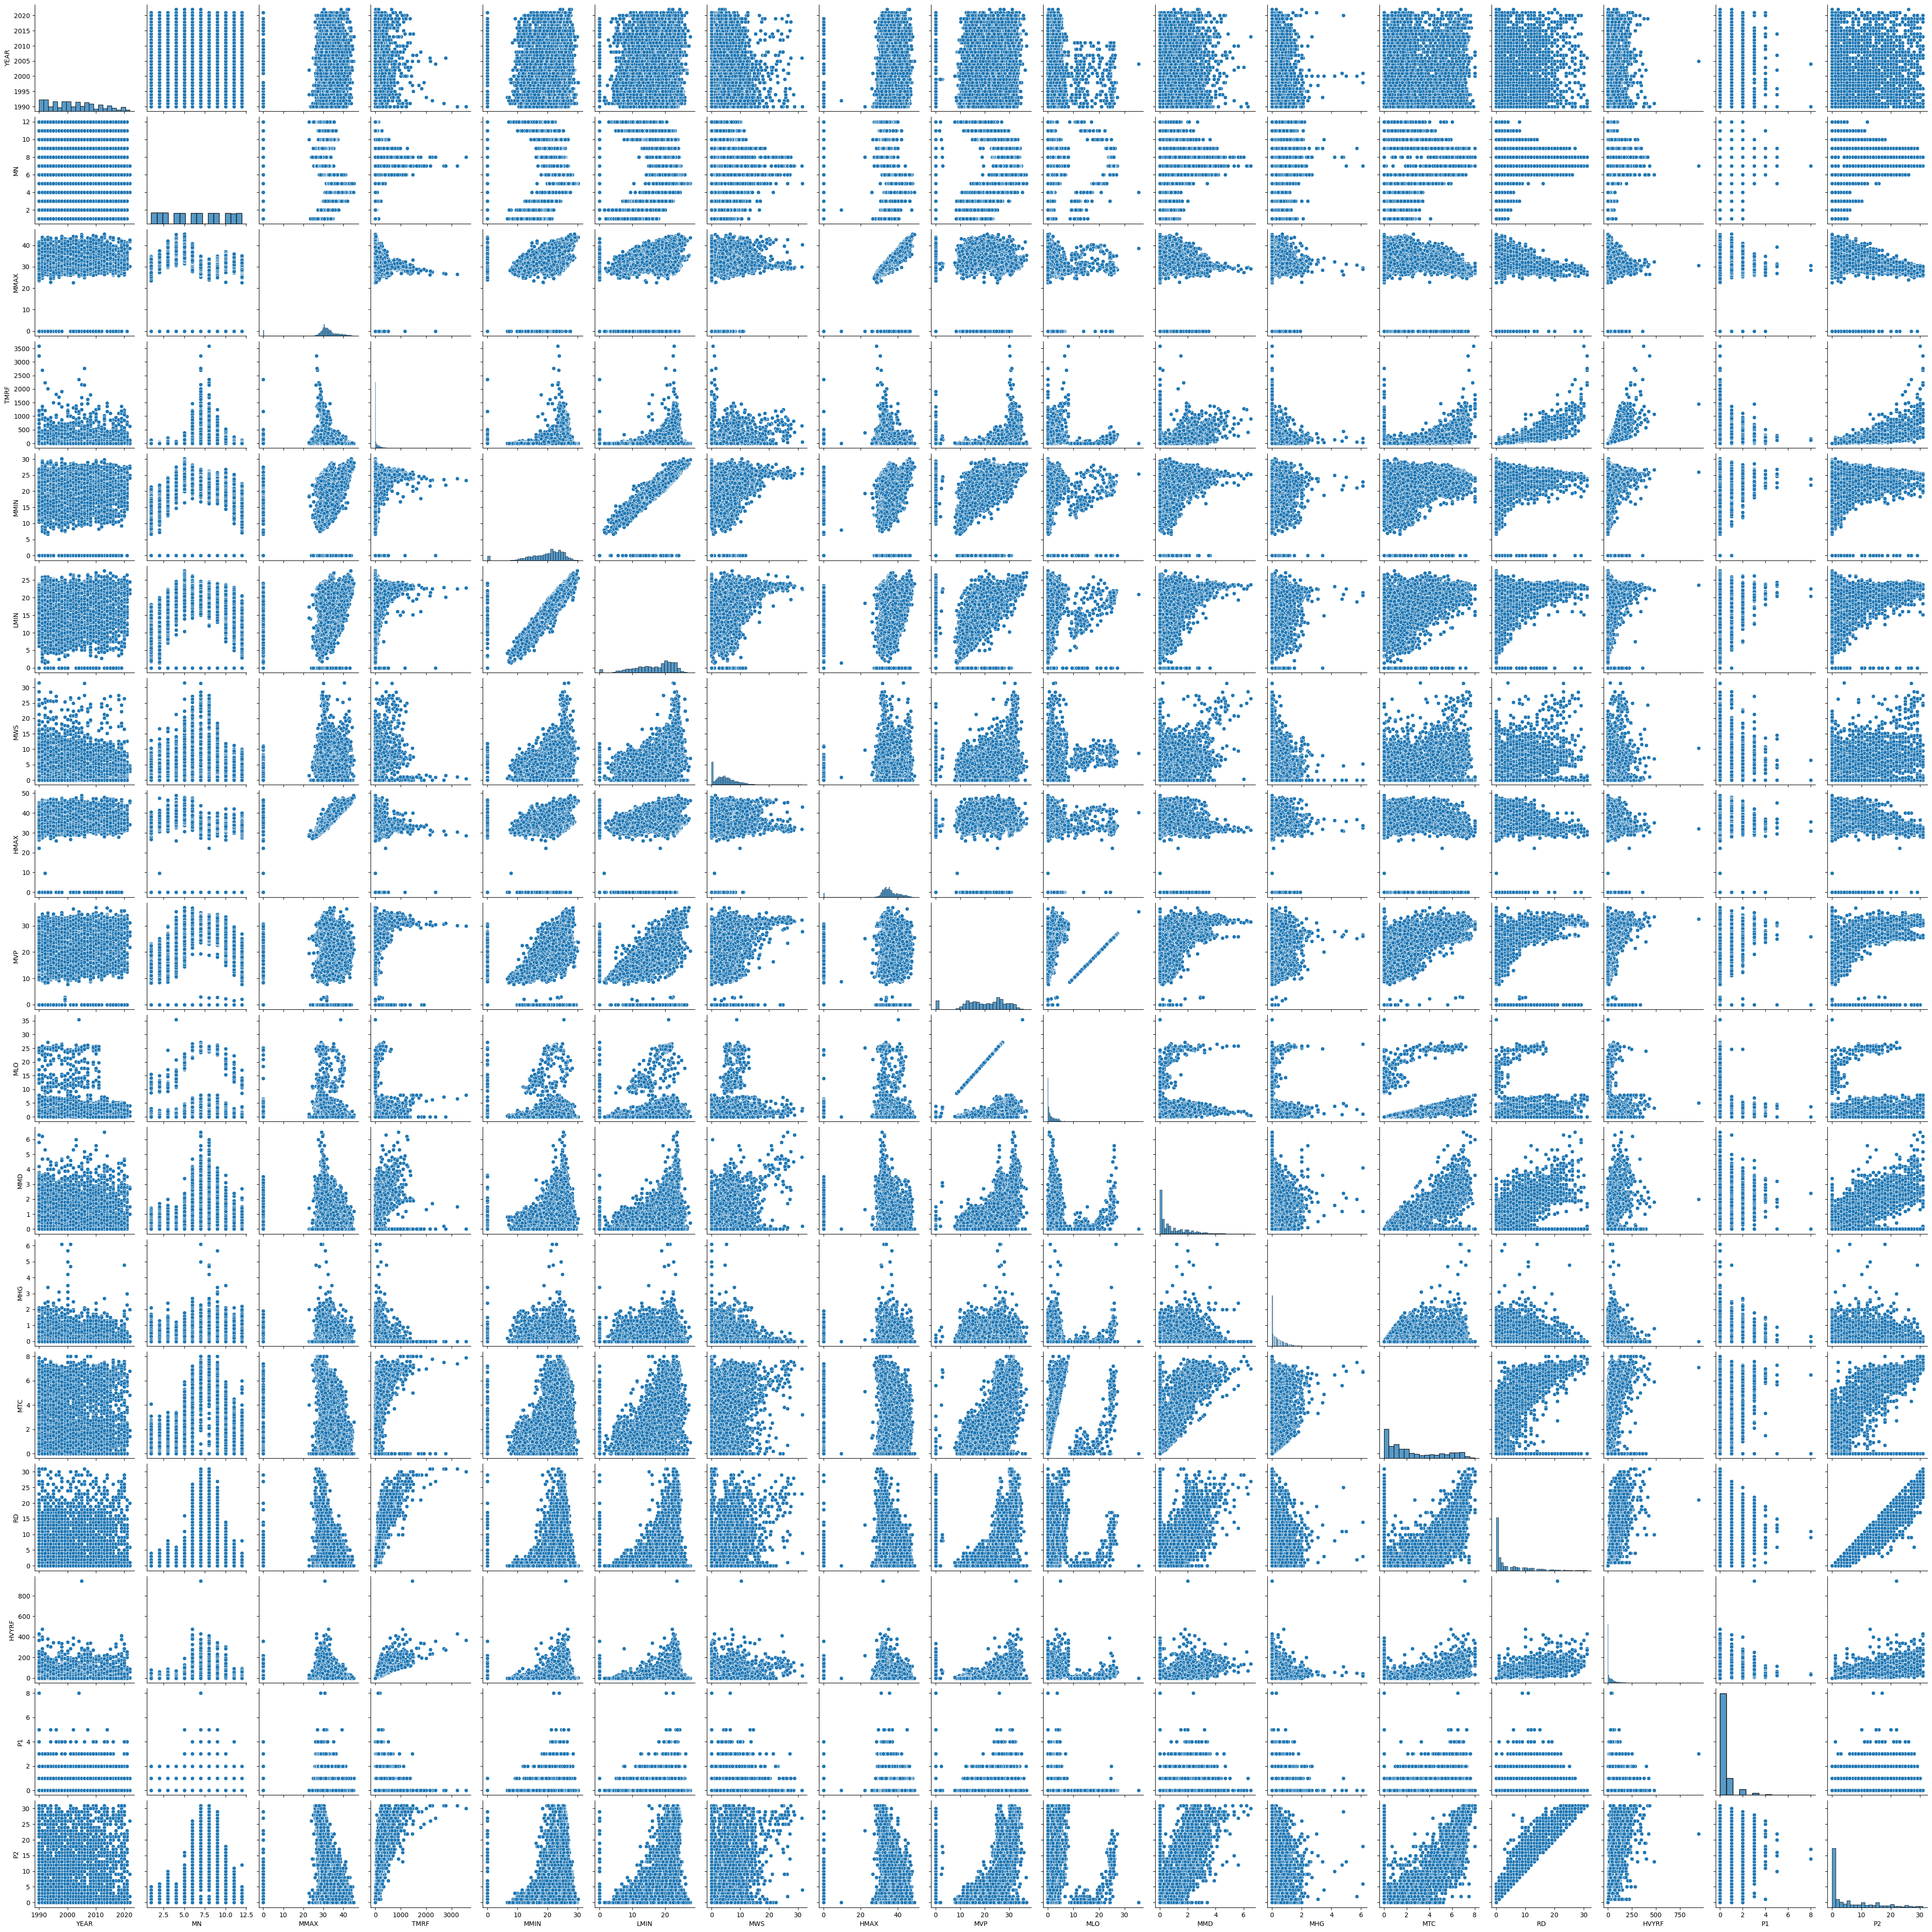

In [9]:
sns.pairplot(data)

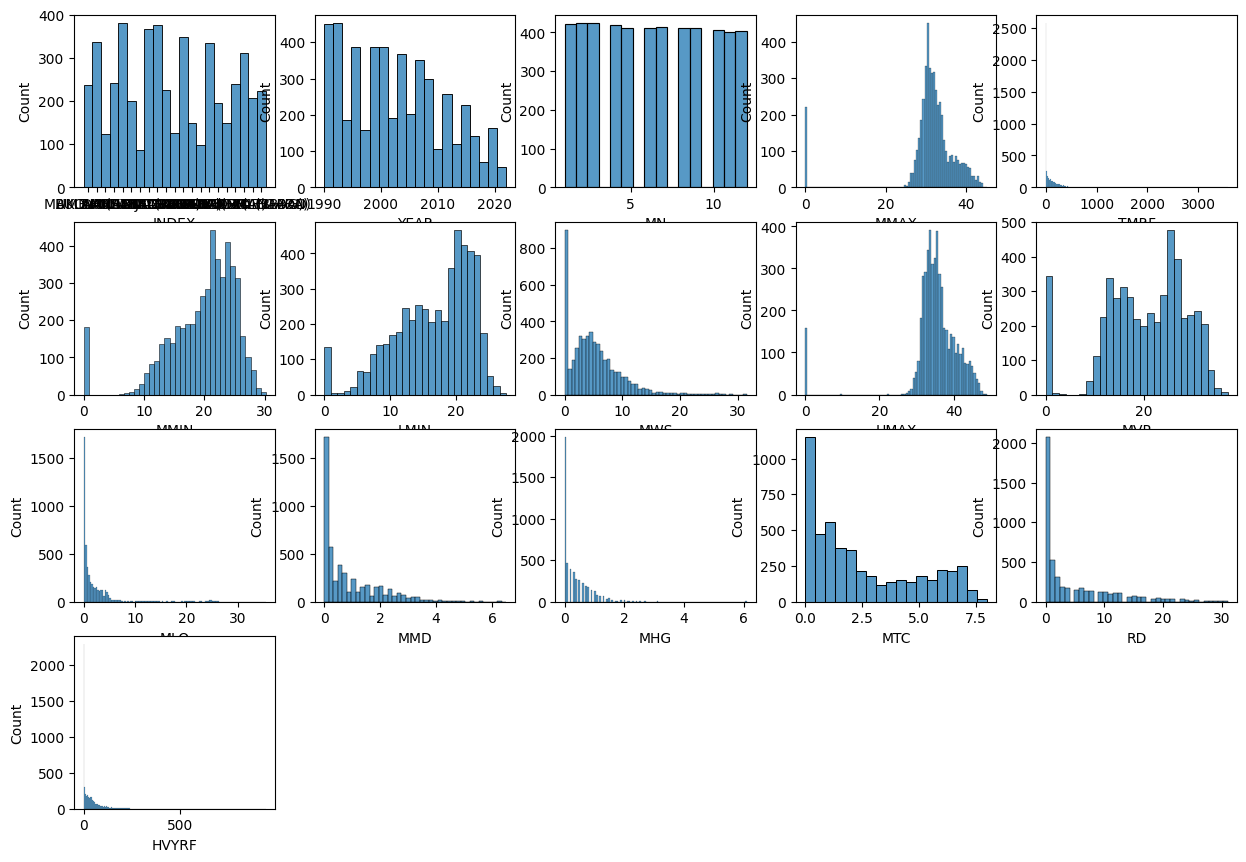

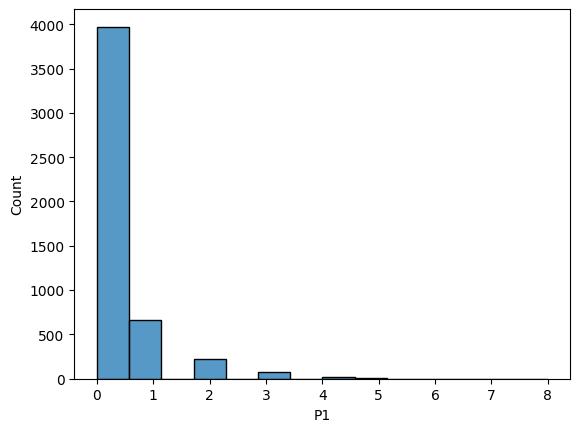

In [10]:
all_columns = data.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(5,5,i)
    sns.histplot(data[column])
    i+=1
plt.show()

sns.histplot(data[all_columns[-1]])
plt.show()

In [12]:
'''corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")'''

'corrmat=data.corr()\ntop_corr_features=corrmat.index\nplt.figure(figsize=(20,20))\ng=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")'

In [14]:
'''plt.figure(figsize = (13,11))
sns.heatmap(data.corr(), center = 0, annot = True)
plt.show()'''

'plt.figure(figsize = (13,11))\nsns.heatmap(data.corr(), center = 0, annot = True)\nplt.show()'

In [15]:
district_name_label_encoder = LabelEncoder()
data["INDEX"] = district_name_label_encoder.fit_transform(data["INDEX"])

In [16]:
district_dict = {}
for i in range(len(data["INDEX"].unique())):
    district_dict[i] = district_name_label_encoder.inverse_transform([i])[0]
print(district_dict)

{0: 'AHMEDNAGAR', 1: 'AKOLA', 2: 'AKOLA CITY', 3: 'AMRAOTI', 4: 'BEED', 5: 'BULDANA', 6: 'CHIKALTHANA', 7: 'JALGAON', 8: 'KOLHAPUR', 9: 'LATUR', 10: 'MUMBAI (KULABA)', 11: 'MUMBAI (SANTACRUZ)', 12: 'NAGPUR', 13: 'NAGPUR CITY', 14: 'NANDED', 15: 'NASHIK ', 16: 'NASHIK  (MALEGAON)', 17: 'NASIK (OZAR)', 18: 'OSMANABAD', 19: 'RAIGAD (ALIBAG)', 20: 'RAIGAD (BHIRA)'}


In [17]:
data.head()

INDEX  YEAR  MN  MMAX  TMRF  MMIN  LMIN   MWS  HMAX   MVP   MLO  MMD  MHG   
0      5  1990   1  29.3   1.5  14.5  12.7   6.3  32.4  13.4  13.4  0.2  0.0  \
1      5  1990   2  32.2   0.0  14.6  13.6   6.3  32.4  12.3  12.3  0.8  0.0   
2      5  1990   3  34.0   0.0  17.0  14.0   6.4  36.4  17.2  17.2  0.3  0.0   
3      5  1990   4  37.7   0.0  21.3  19.6   8.6  40.4  20.8  20.8  0.0  0.0   
4      5  1990   5  36.2  59.6  22.3  18.2  10.6  39.2   0.0   0.0  1.2  0.0   

   MTC  RD  HVYRF  P1  P2  
0  0.2   0    1.5   0   1  
1  0.8   0    0.0   0   0  
2  0.3   0    0.0   0   0  
3  0.0   0    0.0   0   0  
4  2.1   6   18.8   0   6

In [18]:
x =data.drop(['TMRF'],axis=1)
y =data['TMRF']

In [19]:
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [20]:
x.isnull().sum()

INDEX    0
YEAR     0
MN       0
MMAX     0
MMIN     0
LMIN     0
MWS      0
HMAX     0
MVP      0
MLO      0
MMD      0
MHG      0
MTC      0
RD       0
HVYRF    0
P1       0
P2       0
dtype: int64

In [21]:
y.isnull().sum()

0

In [22]:
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [23]:
print(model.feature_importances_)

[0.0226425  0.00840907 0.00918781 0.01277913 0.00730427 0.00525003
 0.01443111 0.00741553 0.00884207 0.00551473 0.01064565 0.00204841
 0.010008   0.45936543 0.22923635 0.00216357 0.18475633]


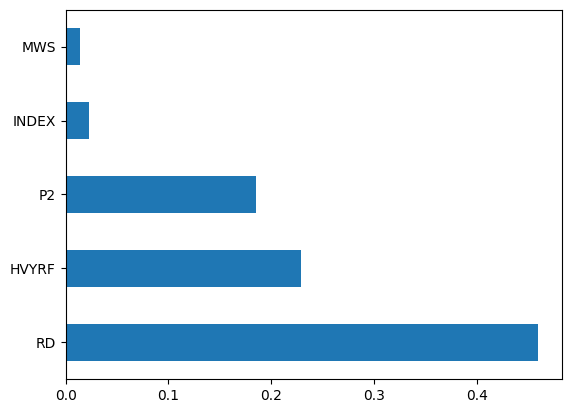

In [24]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [26]:
x_train.shape

(3473, 17)

In [27]:
x_test.shape

(1489, 17)

In [28]:
rf_random=RandomForestRegressor()

In [29]:
n_estimators=[int(x) for x in np.linspace(start = 100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [30]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [31]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [32]:
rf = RandomForestRegressor()

In [33]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [34]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.2s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.1s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.9s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.3s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.0s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.4s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.8s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.3s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.9s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.8s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  16.2s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  16.1s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  16.4s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  15.6s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  15.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  15.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.3s
[CV] END max_depth=5, max_feat

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.6s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.3s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.1s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.2s


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  18.8s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [36]:
rf_random.best_score_

-4988.2538350819195

In [37]:
predictions=rf_random.predict(x_test)

In [38]:
predictions

array([4.95543e+00, 1.96550e+00, 1.19632e+02, ..., 2.26026e+01,
       8.62000e-02, 7.20026e+01])

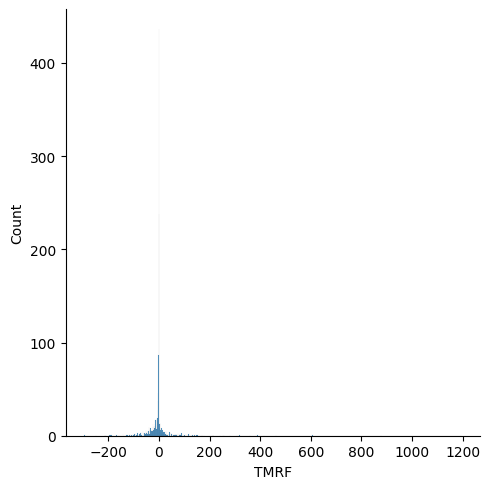

In [40]:
sns.displot(y_test-predictions)

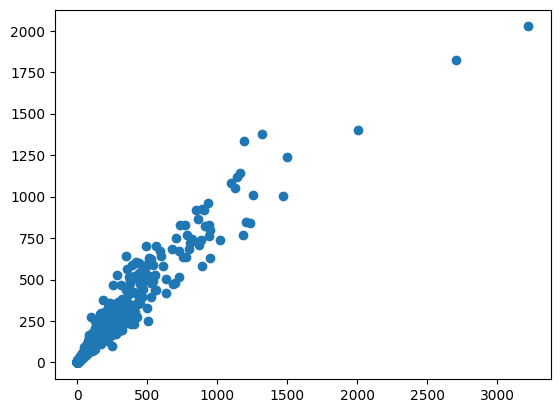

In [41]:
plt.scatter(y_test,predictions)

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 21.190348151487356
MSE: 3954.0688456209004
RMSE: 62.881387115909746


In [43]:
input_data = (6,1990,7,27.8,19.5,17.6,11.1,31.4,23.5,23.5,3.2,0,6,11,63.4,0,17)  #actuAL VALUE 197.8  #2.73% error

In [44]:
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = rf_random.predict(input_data_reshaped)
print('Rainfall :' ,prediction)    

Rainfall : [204.9149]


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [45]:
input_data =(2,2001,4,39.3,23.3,20.3,5,44.6,16.3,1,1.5,0.1,2.6,3,14.4,1,4)  #actuAL VALUE 28.8  #3.29% error

In [46]:
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_random.predict(input_data_reshaped)
print('Rainfall :' ,prediction)    

Rainfall : [29.2378]


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [47]:
pickle.dump(rf_random, open('rainfall_rf_1.pkl', 'wb'))
pickle.dump(district_dict, open("district_rain_dict.pkl", "wb"))
print("Saved All Models")

Saved All Models
